<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/Labeling/Cleaning_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 139 (delta 60), reused 59 (delta 17), pack-reused 0
Receiving objects: 100% (139/139), 607.26 KiB | 2.33 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/MADSmilestone2
ian_testingground.ipynb  Images.ipynb  Images.py  Labeling  Loading  README.md


In [ ]:
#!rm -rf /content/MADSmilestone2/MADSmilestone2/MADSmilestone2

In [3]:
import pandas as pd
import numpy as np
import Labeling.clean_rounds as cr
import Labeling.label_data as ld
import matplotlib.pyplot as plt



# Load Rounds data
rounds = pd.read_csv('Loading/round_data.csv')
rounds

,spid,cg1dclkdraw,hc1disescn9,round
0,10000003.0,3 Mildly distorted depiction of a clock,2 NO,1
1,10000004.0,3 Mildly distorted depiction of a clock,2 NO,1
2,10000005.0,3 Mildly distorted depiction of a clock,2 NO,1
3,10000006.0,4 Reasonably accurate depiction of a clock,2 NO,1
4,10000007.0,-2 Proxy says cannot ask SP,2 NO,1
...,...,...,...,...
25851,10000493.0,-2 Proxy says cannot ask SP,7 PREVIOUSLY REPORTED,4
25852,10004106.0,4 Reasonably accurate depiction of a clock,2 NO,4
25853,10007223.0,3 Mildly distorted depiction of a clock,2 NO,4
25854,10011759.0,-1 Inapplicable,-9 Missing,4


###Check values for columns of interest
- we used the user guide to determine which columns are required


In [4]:
print("Column values for clock scores: \n", rounds['cg1dclkdraw'].unique())
print("\nHealth score values: \n", rounds['hc1disescn9'].unique())
print("\nVariable types: \n", rounds.dtypes)
rounds[rounds['cg1dclkdraw'] == '-1 Inapplicable'].head()

Column values for clock scores: 
 ['3 Mildly distorted depiction of a clock'
 '4 Reasonably accurate depiction of a clock'
 '-2 Proxy says cannot ask SP'
 '2 Moderately distorted depection of a clock' '-1 Inapplicable'
 '-7 SP refused to draw clock'
 '5 Accurate depiction of a clock (circular or square)'
 '1 Severely distorted depiction of a clock'
 '-4 SP did not attempt to draw clock' '0 Not recognizable as a clock'
 '-3 Proxy says can ask SP but SP unable to answer' '-9 Missing']

Health score values: 
 [' 2 NO' '-1 Inapplicable' ' 1 YES' '-9 Missing' '-8 DK' '2 NO'
 '7 PREVIOUSLY REPORTED' '1 YES' '-7 RF']

Variable types: 
 spid           float64
cg1dclkdraw     object
hc1disescn9     object
round            int64
dtype: object


,spid,cg1dclkdraw,hc1disescn9,round
6,10000009.0,-1 Inapplicable,-1 Inapplicable,1
8,10000013.0,-1 Inapplicable,-1 Inapplicable,1
10,10000015.0,-1 Inapplicable,-1 Inapplicable,1
33,10000046.0,-1 Inapplicable,-9 Missing,1
47,10000067.0,-1 Inapplicable,-9 Missing,1


In [5]:
# Load the cleaned dataframe
cleaned_rounds = cr.clean_data(rounds)
cleaned_rounds

,spid,cg1dclkdraw,hc1disescn9,round
0,10000003,3 Mildly distorted depiction of a clock,2.0,1
1,10000004,3 Mildly distorted depiction of a clock,2.0,1
2,10000005,3 Mildly distorted depiction of a clock,2.0,1
3,10000006,4 Reasonably accurate depiction of a clock,2.0,1
5,10000008,2 Moderately distorted depection of a clock,2.0,1
...,...,...,...,...
25849,10011980,5 Accurate depiction of a clock (circular or s...,2.0,4
25850,10003785,4 Reasonably accurate depiction of a clock,2.0,4
25852,10004106,4 Reasonably accurate depiction of a clock,2.0,4
25853,10007223,3 Mildly distorted depiction of a clock,2.0,4


In [6]:
#Check that we only have healthscores of 1, 2, 7 and subjects that have drawn clocks
print("health score check: \n",cleaned_rounds.cg1dclkdraw.unique())
print("\n clock scores check: \n",cleaned_rounds['hc1disescn9'].unique())

health score check: 
 ['3 Mildly distorted depiction of a clock'
 '4 Reasonably accurate depiction of a clock'
 '2 Moderately distorted depection of a clock'
 '5 Accurate depiction of a clock (circular or square)'
 '1 Severely distorted depiction of a clock'
 '0 Not recognizable as a clock']

 clock scores check: 
 [2. 1. 7.]


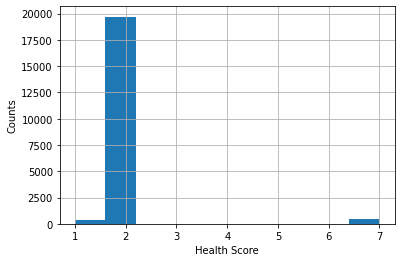

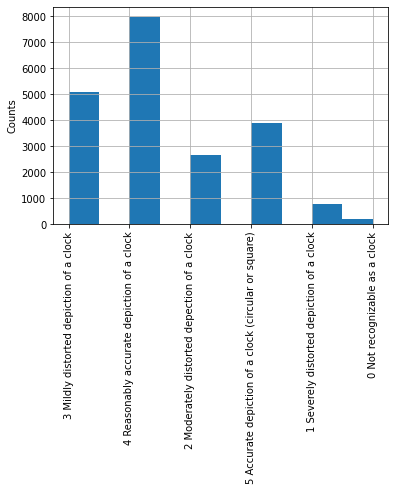

In [7]:
# Check balance of dataset
a = cleaned_rounds.hc1disescn9.hist() 
plt.xlabel("Health Score")
plt.ylabel("Counts")
plt.show(a) 


b = cleaned_rounds.cg1dclkdraw.hist()
b.tick_params(axis='x', labelrotation = 90)
plt.ylabel("Counts")
plt.show(b)

###Create Labels for the rounds data

In [8]:
labeled_data = ld.create_labels(cleaned_rounds)
labeled_data

,spid,cg1dclkdraw,hc1disescn9,round,label
0,10000003,3 Mildly distorted depiction of a clock,2.0,1,2
1,10000004,3 Mildly distorted depiction of a clock,2.0,1,2
2,10000005,3 Mildly distorted depiction of a clock,2.0,1,2
3,10000006,4 Reasonably accurate depiction of a clock,2.0,1,2
5,10000008,2 Moderately distorted depection of a clock,2.0,1,2
...,...,...,...,...,...
25849,10011980,5 Accurate depiction of a clock (circular or s...,2.0,4,2
25850,10003785,4 Reasonably accurate depiction of a clock,2.0,4,2
25852,10004106,4 Reasonably accurate depiction of a clock,2.0,4,2
25853,10007223,3 Mildly distorted depiction of a clock,2.0,4,2


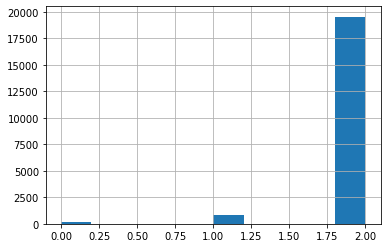

In [9]:
# Look at distribution of labels
labeled_data.label.hist() 

### Get Individual participant IDs per round
- useful for pulling in exact images per round
- create text file to store dictionary

In [12]:
ids = ld.get_ids(labeled_data)
ids[1]['10000003'] 

2